Imports + Fetching Data Set

In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
#fetching the dataset
WholeSale_customers=fetch_ucirepo(id = 292)
#converting to pandas dataframe
dataFrame = pd.DataFrame(WholeSale_customers.data.original)


In [3]:
#checking for null values
print(dataFrame.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
#checking for duplicate rows
duplicate_rows = dataFrame[dataFrame.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


Determining the Optimal Number of Clusters:

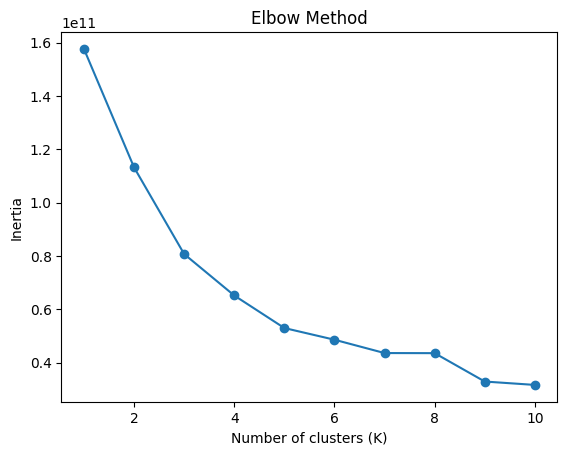

In [5]:
inertias =[]

k_values=range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataFrame)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Feature Scaling

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataFrame)

Dimensionality Reduction

In [12]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

Model Training with K-Means

In [13]:
#optimal number is 7
kmeans = KMeans(n_clusters = 7, random_state = 42)
clusters=kmeans.fit(data_pca)
cluster_lables=kmeans.labels_
cluster_centers=kmeans.cluster_centers_

Visualization

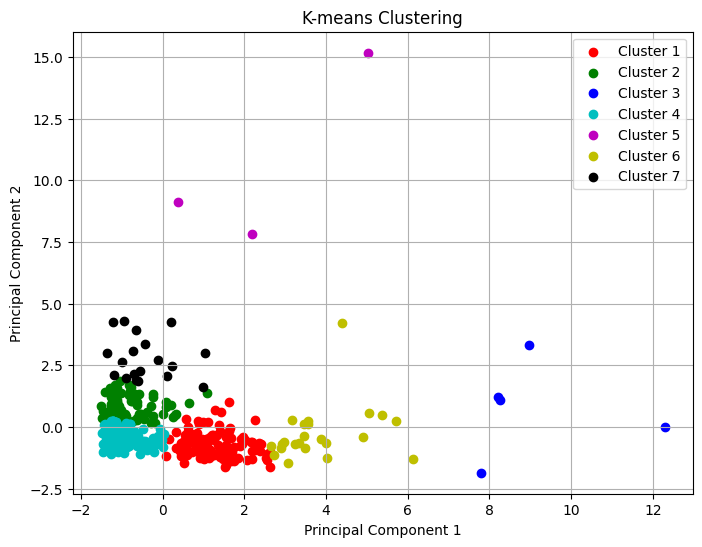

In [14]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8, 6))

for cluster_label in range(7):
    plt.scatter(data_pca[cluster_lables == cluster_label, 0], 
                data_pca[cluster_lables == cluster_label, 1],
                c=colors[cluster_label], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()
